In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
PATH = "../../kagglecatsanddogs_3367a/PetImages/"
CAT = PATH+"Cat/"
DOG = PATH+"Dog/"

For some reason OpenCV was not loading all the images at once. Thus I have used two loops to read images for CATS and DOGS individually.

In [4]:
data = []

for images in os.listdir(DOG):
    image_path = os.path.join(DOG,images)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    if image is not None:
        image = cv2.resize(image,(64,64))
        data.append([np.array(image),np.array([0.0,1.0])])

In [5]:
for images in os.listdir(CAT):
    image_path = os.path.join(CAT,images)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    if image is not None:
        image = cv2.resize(image,(64,64))
        data.append([np.array(image),np.array([1.0,0.0])])

In [6]:
len(data)

24944

In [7]:
data[0]

[array([[[ 28,  36,  66],
         [ 28,  38,  62],
         [ 27,  35,  64],
         ...,
         [ 79,  97, 127],
         [ 80,  98, 121],
         [103, 126, 151]],
 
        [[ 27,  35,  65],
         [ 32,  42,  66],
         [ 26,  34,  63],
         ...,
         [ 71,  93, 122],
         [ 80, 103, 125],
         [ 97, 125, 150]],
 
        [[ 22,  33,  55],
         [ 31,  41,  66],
         [ 25,  33,  61],
         ...,
         [ 88, 108, 137],
         [ 94, 115, 136],
         [108, 135, 156]],
 
        ...,
 
        [[207, 203, 211],
         [210, 208, 214],
         [194, 194, 200],
         ...,
         [187, 182, 182],
         [185, 177, 177],
         [194, 184, 184]],
 
        [[196, 192, 198],
         [187, 185, 191],
         [189, 189, 195],
         ...,
         [195, 189, 189],
         [191, 183, 183],
         [201, 191, 191]],
 
        [[197, 194, 200],
         [194, 190, 196],
         [186, 183, 189],
         ...,
         [194, 189, 188],
  

In [8]:
random.seed(0)
random.shuffle(data)

In [9]:
X = []
y = []

for features,labels in data:
    X.append(features)
    y.append(labels)

In [10]:
for i in range(len(X)):
    X[i] = X[i].reshape(1,-1)
    X[i] = X[i]/255
    X[i] = X[i].squeeze()
    X[i] = X[i].tolist()

In [11]:
len(y)

24944

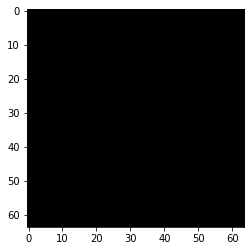

In [22]:
# from PIL import Image
# # f1 = open("../test_img1.data","a+")
# # f2 = open("../test_img2.data","a+")
# test_img1 = X[8000] #Dog
# test_img2 = X[8001] #cat
# # for pixel_values in test_img1:
# #     f1.write("%s "%pixel_values)
# # for pixel_values in test_img2:
# # #     f2.write("%s "%pixel_values)
# # test_img1 = np.array(test_img1)
# # test_img2 = np.array(test_img2)
# # test_img1 = test_img1.reshape((64,64,3)).astype('uint8')
# # test_img2 = test_img2.reshape((64,64,3)).astype('uint8')
# # temp_image = Image.fromarray(test_img2)
# # plt.imshow(temp_image)
# # plt.show()


In [12]:
f = open("../data/X_train.data","a+")
for images in X[:4000]:
    for pixel_values in images:
        f.write("%s "%pixel_values)
f.close()
f = open("../data/X_cv.data","a+")
for images in X[4000:5000]:
    for pixel_values in images:
        f.write("%s "%pixel_values)
f.close()
f = open("../data/X_test.data","a+")
for images in X[5000:6000]:
    for pixel_values in images:
        f.write("%s "%pixel_values)
f.close()

In [13]:
f = open("../data/y_train.data","a+")
for labels in y[:4000]:
    for class_scores in labels:
        f.write("%s "%class_scores)
f.close()
f = open("../data/y_cv.data","a+")
for labels in y[4000:5000]:
    for class_scores in labels:
        f.write("%s "%class_scores)
f.close()
f = open("../data/y_test.data","a+")
for labels in y[5000:6000]:
    for class_scores in labels:
        f.write("%s "%class_scores)
f.close()

